In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

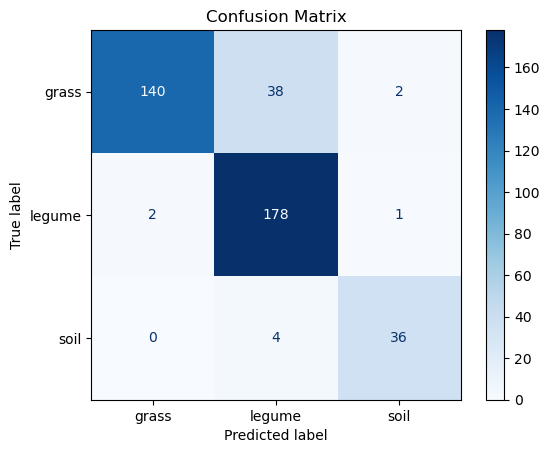

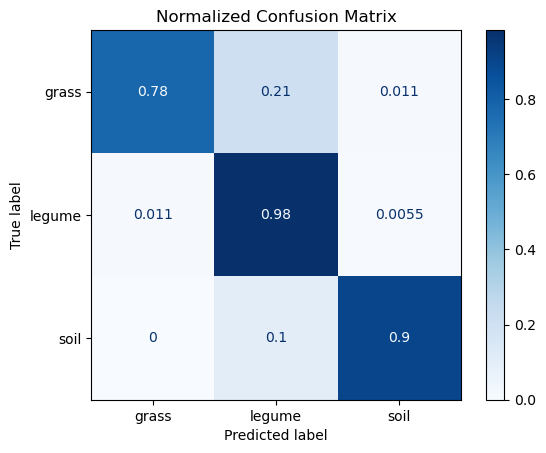

In [27]:
# Step 1: Load the data from Excel
# data = pd.read_excel('./train/train_all.xlsx')
data =pd.read_csv("./all_data.csv")

# Step 2: Prepare the features (X) and target (y)
X = data.iloc[:,0:12]
y = data['class']

# Step 3: Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5)
y_pred = cross_val_predict(rf_clf, X, y, cv=cv)


# Step 5: Generate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["grass","legume","soil"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Normalize the confusion matrix (to percentages)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=["grass","legume","soil"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()

# df_out = data
# df_out['y_truth'] = y
# df_out['y_pre'] = y_pred
# df_out.to_csv("./train_5cv_rf.csv",index=True)


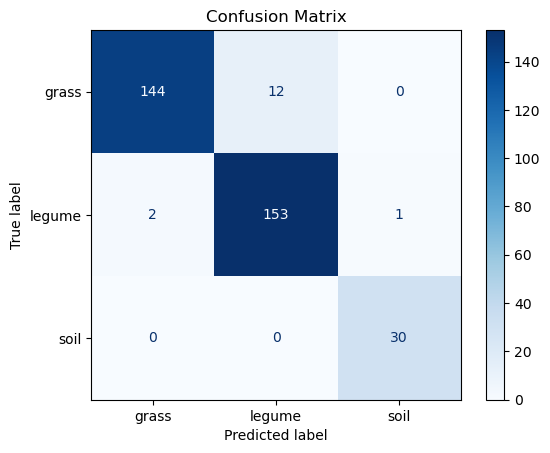

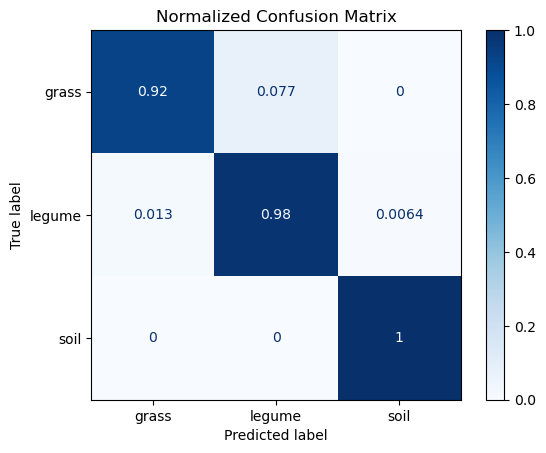

In [28]:

# Step 1: Load the data from Excel
# data = pd.read_excel('./train/train_all.xlsx')
data =pd.read_csv("./all_data.csv")
data = data[data["set"] == "Train"]

# Step 2: Prepare the features (X) and target (y)
X = data.iloc[:,0:12]
y = data['class']

# Step 3: Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5)
y_pred = cross_val_predict(rf_clf, X, y, cv=cv)


# Step 5: Generate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["grass","legume","soil"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Normalize the confusion matrix (to percentages)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=["grass","legume","soil"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()

# df_out = data
# df_out['y_truth'] = y
# df_out['y_pre'] = y_pred
# df_out.to_csv("./train_5cv_rf.csv",index=True)


(342, 12)
(59, 12)
Best Parameters: OrderedDict([('max_depth', 40), ('max_features', 5), ('min_samples_leaf', 10), ('min_samples_split', 10), ('n_estimators', 700)])
Best Score: 0.9295396419437341


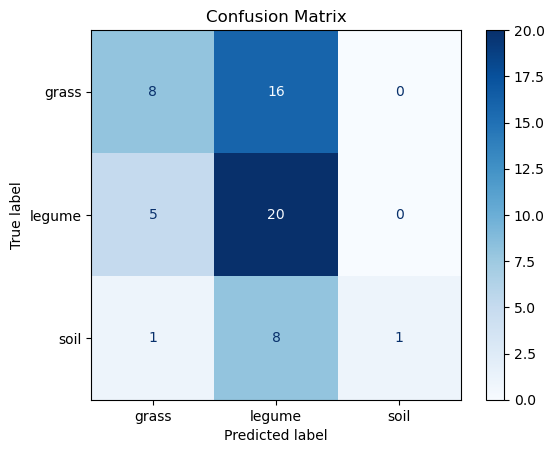

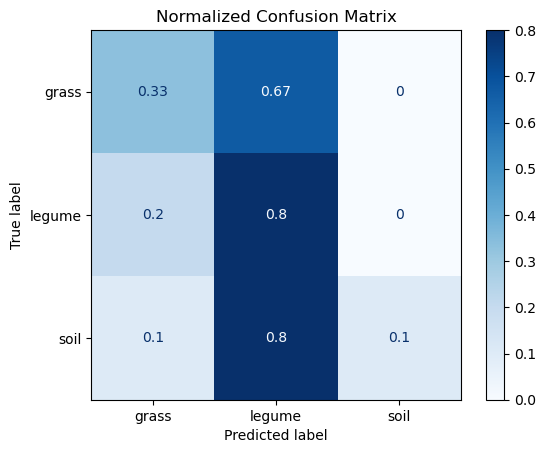

In [30]:
# Step 1: Load the data from Excel
data =pd.read_csv("./all_data.csv")

data_train = data[data["set"] == "Train"]

# Step 2: Prepare the features (X) and target (y)
X_train = data_train.iloc[:,0:12]
y_train = data_train['class']



data_test = data[data["set"] == "test"]
X_test = data_test.iloc[:,0:12]
y_test = data_test['class']

print(X_train.shape)
print(X_test.shape)

rf = RandomForestClassifier(random_state=42)

search_space = {
    'n_estimators': [100,200,300,400,500,600,700],
    'max_depth': [10,20, 30, 40,50],
    'min_samples_split': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'max_features': [5,10,15, 20, 25]
}

# Step 8: Set up the BayesSearchCV
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=search_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Step 9: Fit the model
opt.fit(X_train, y_train)

# Step 10: Print the best parameters and best score
print("Best Parameters:", opt.best_params_)
print("Best Score:", opt.best_score_)

y_pred = opt.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["grass","legume","soil"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Normalize the confusion matrix (to percentages)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=["grass","legume","soil"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()

(377, 12)
(24, 12)
Best Parameters: OrderedDict([('max_depth', 30), ('max_features', 1), ('min_samples_leaf', 4), ('min_samples_split', 4), ('n_estimators', 50)])
Best Score: 0.9175789473684212


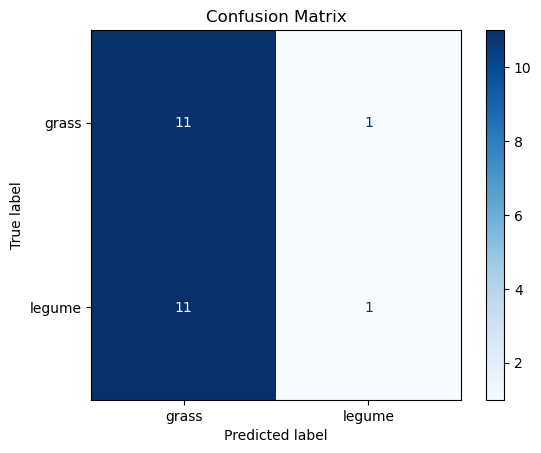

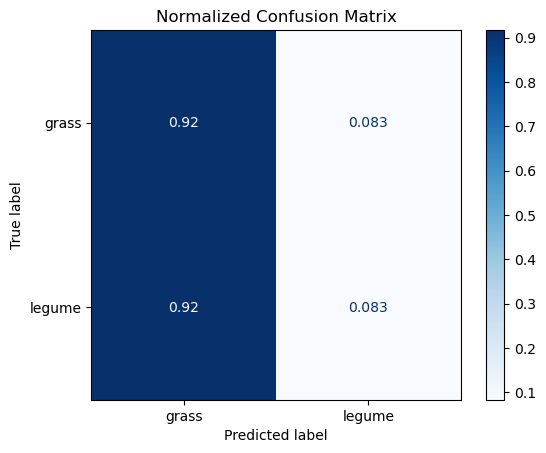

In [35]:
# Step 1: Load the data from Excel
data =pd.read_csv("./all_data.csv")

data_train = data[data["pad"] != "pd9"]

# Step 2: Prepare the features (X) and target (y)
X_train = data_train.iloc[:,0:12]
y_train = data_train['class']



data_test = data[data["pad"] == "pd9"]
X_test = data_test.iloc[:,0:12]
y_test = data_test['class']

print(X_train.shape)
print(X_test.shape)

rf = RandomForestClassifier(random_state=42)

search_space = {
    'n_estimators': [50,100,200],
    'max_depth': [10,20, 30],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [2,4,6],
    'max_features': [1,3,5]
}

# Step 8: Set up the BayesSearchCV
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=search_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Step 9: Fit the model
opt.fit(X_train, y_train)

# Step 10: Print the best parameters and best score
print("Best Parameters:", opt.best_params_)
print("Best Score:", opt.best_score_)

y_pred = opt.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Normalize the confusion matrix (to percentages)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()

(377, 12)
(24, 12)
Best Parameters: OrderedDict([('max_depth', 10), ('max_features', 5), ('min_samples_leaf', 2), ('min_samples_split', 6), ('n_estimators', 100)])
Best Score: 0.912140350877193


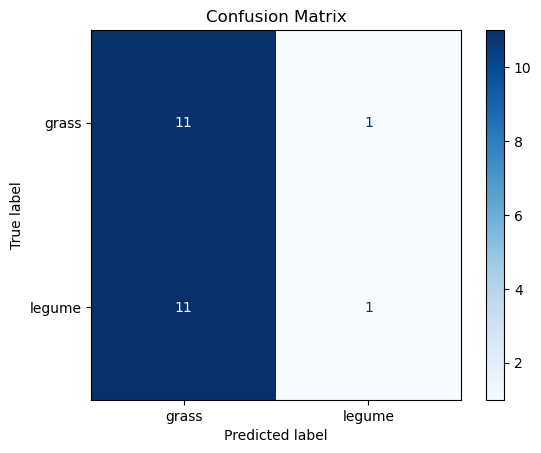

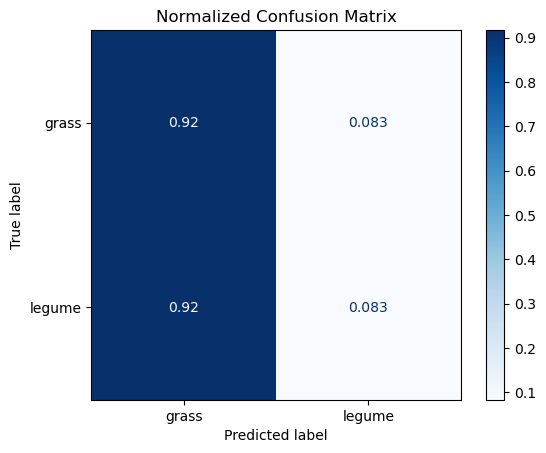

In [36]:
# Step 1: Load the data from Excel
data =pd.read_csv("./all_data.csv")

data_train = data[data["pad"] != "pd5"]

# Step 2: Prepare the features (X) and target (y)
X_train = data_train.iloc[:,0:12]
y_train = data_train['class']



data_test = data[data["pad"] == "pd5"]
X_test = data_test.iloc[:,0:12]
y_test = data_test['class']

print(X_train.shape)
print(X_test.shape)

rf = RandomForestClassifier(random_state=42)

search_space = {
    'n_estimators': [50,100,200],
    'max_depth': [10,20, 30],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [2,4,6],
    'max_features': [1,3,5]
}

# Step 8: Set up the BayesSearchCV
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=search_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Step 9: Fit the model
opt.fit(X_train, y_train)

# Step 10: Print the best parameters and best score
print("Best Parameters:", opt.best_params_)
print("Best Score:", opt.best_score_)

y_pred = opt.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Normalize the confusion matrix (to percentages)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()

(376, 12)
(25, 12)
Best Parameters: OrderedDict([('max_depth', 30), ('max_features', 3), ('min_samples_leaf', 2), ('min_samples_split', 6), ('n_estimators', 100)])
Best Score: 0.9173684210526316


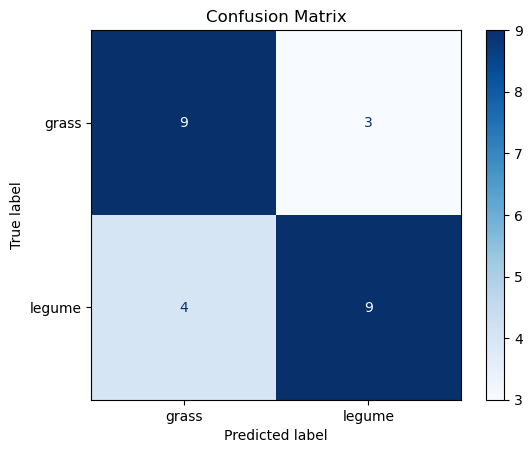

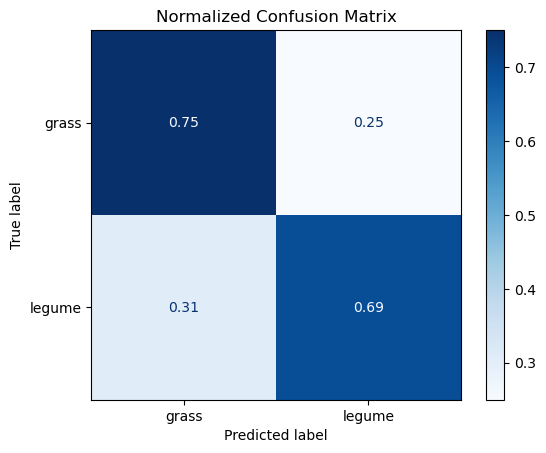

In [37]:
# Step 1: Load the data from Excel
data =pd.read_csv("./all_data.csv")

data_train = data[data["pad"] != "pd3"]

# Step 2: Prepare the features (X) and target (y)
X_train = data_train.iloc[:,0:12]
y_train = data_train['class']



data_test = data[data["pad"] == "pd3"]
X_test = data_test.iloc[:,0:12]
y_test = data_test['class']

print(X_train.shape)
print(X_test.shape)

rf = RandomForestClassifier(random_state=42)

search_space = {
    'n_estimators': [50,100,200],
    'max_depth': [10,20, 30],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [2,4,6],
    'max_features': [1,3,5]
}

# Step 8: Set up the BayesSearchCV
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=search_space,
    n_iter=32,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Step 9: Fit the model
opt.fit(X_train, y_train)

# Step 10: Print the best parameters and best score
print("Best Parameters:", opt.best_params_)
print("Best Score:", opt.best_score_)

y_pred = opt.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Normalize the confusion matrix (to percentages)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()

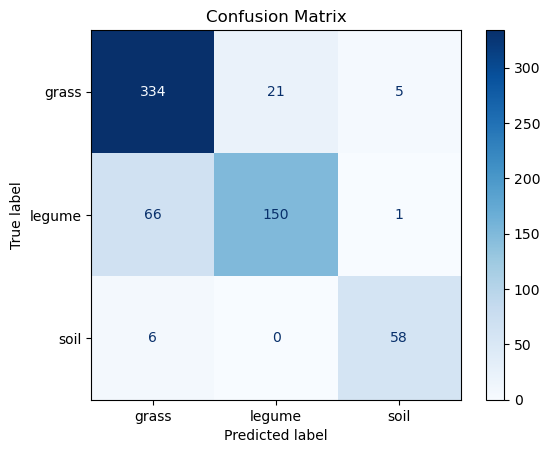

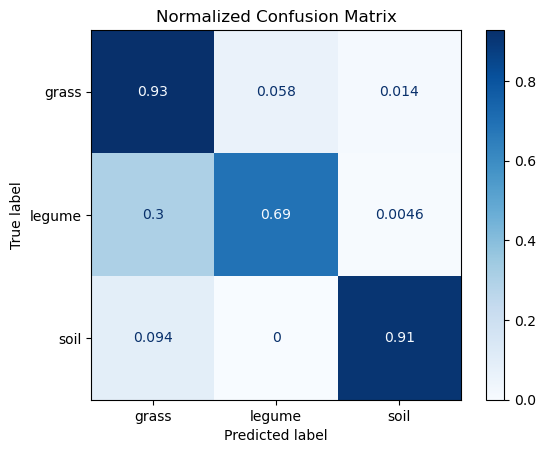

In [5]:
# Step 1: Load the data from Excel
# data = pd.read_excel('./train/train_all.xlsx')
data =pd.read_csv("../all_data_two_date.csv")
# Step 2: Prepare the features (X) and target (y)
X = data.iloc[:,0:11]
y = data['class']

# Step 3: Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5)
y_pred = cross_val_predict(rf_clf, X, y, cv=cv)


# Step 5: Generate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["grass","legume","soil"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Normalize the confusion matrix (to percentages)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=["grass","legume","soil"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()

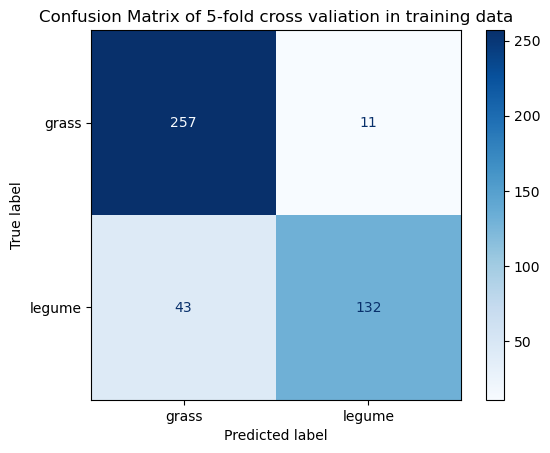

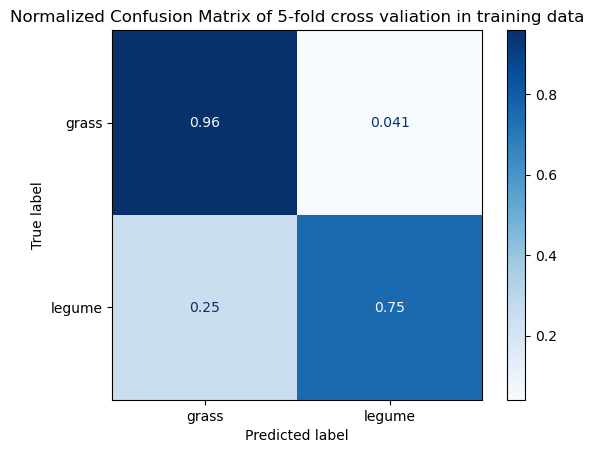

In [2]:

# Step 1: Load the data from Excel
data =pd.read_csv("../all_data_two_date_SAVI_filter_0.9.csv")

# Step 2: Prepare the features (X) and target (y)
X = data.iloc[:,0:11]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5)
y_pred = cross_val_predict(rf_clf, X_train, y_train, cv=cv)

# Step 5: Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of 5-fold cross valiation in training data')
plt.show()

# Normalize the confusion matrix (to percentages)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix of 5-fold cross valiation in training data')
plt.show()

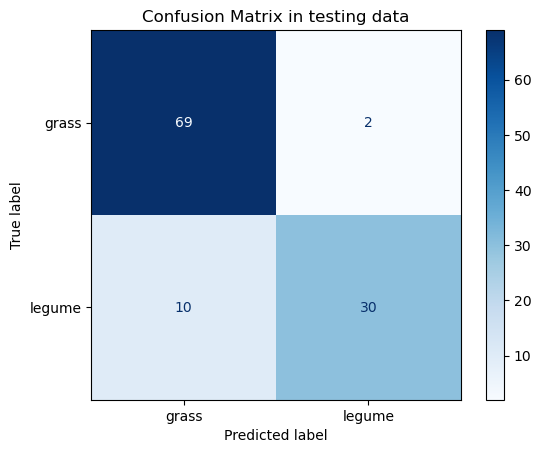

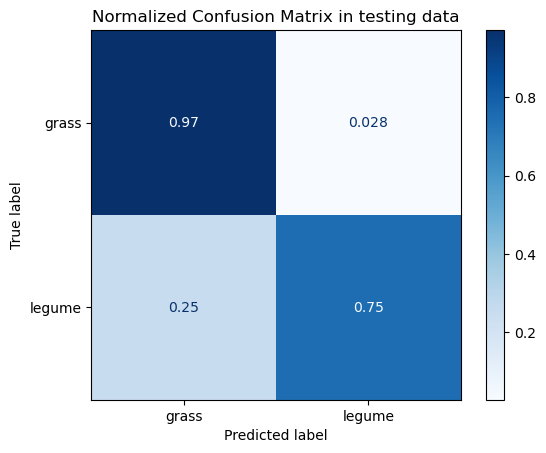

In [3]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_test = rf_model.predict(X_test)

# Step 5: Generate the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix in testing data')
plt.show()

# Normalize the confusion matrix (to percentages)
conf_matrix_normalized_test = conf_matrix_test.astype('float') / conf_matrix_test.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized_test, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix in testing data')
plt.show()

In [21]:
X_train['split'] = "train"
X_train['class'] = y_train
X_test['split'] = "test"
X_test['class'] = y_test

merge_df = pd.concat([X_train,X_test], ignore_index=True)
merge_df.to_csv("../all_data_two_date_SAVI_filter_0.9_split.csv", index=False)

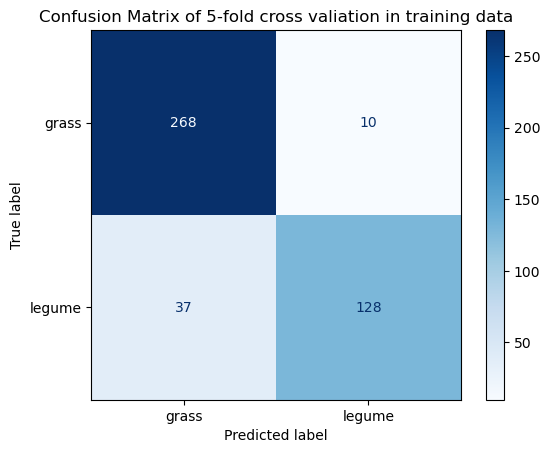

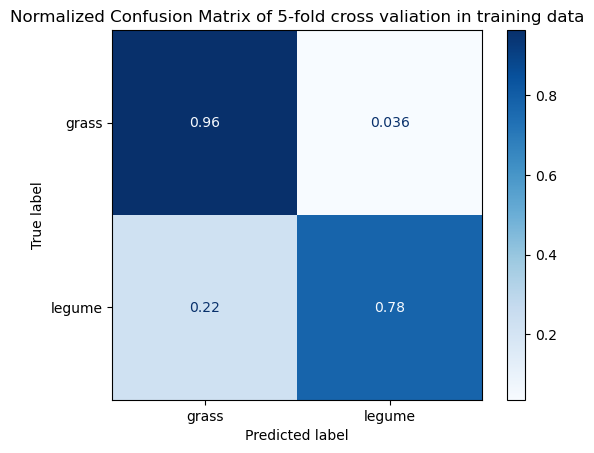

In [4]:
# Step 1: Load the data from Excel
data =pd.read_csv("../all_data_two_date_gps_vi_savi_filter_0.9.csv")

# Step 2: Prepare the features (X) and target (y)
X = data.iloc[:,0:11]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Step 3: Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5)
y_pred = cross_val_predict(rf_clf, X_train, y_train, cv=cv)

# Step 5: Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of 5-fold cross valiation in training data')
plt.show()

# Normalize the confusion matrix (to percentages)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix of 5-fold cross valiation in training data')
plt.show()

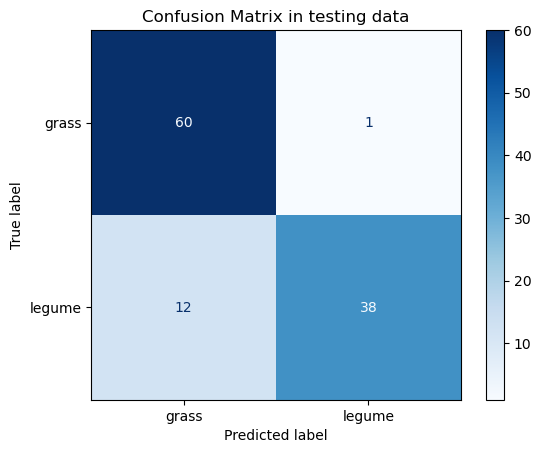

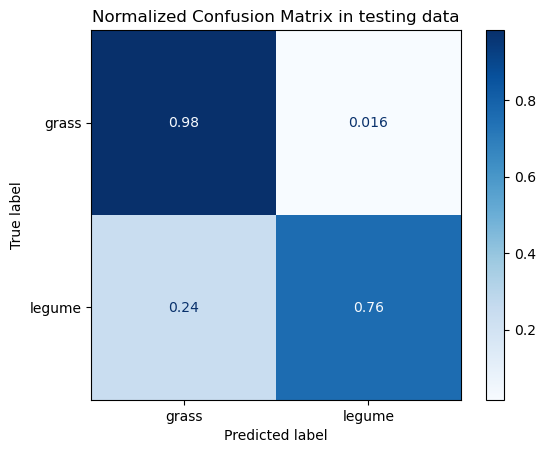

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_test = rf_model.predict(X_test)

# Step 5: Generate the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix in testing data')
plt.show()

# Normalize the confusion matrix (to percentages)
conf_matrix_normalized_test = conf_matrix_test.astype('float') / conf_matrix_test.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized_test, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix in testing data')
plt.show()

In [35]:
# Step 1: Load the CSV file
df = pd.read_csv("../all_data_two_date_gps_vi_savi_filter_0.9.csv")

# Step 2: Split the data into training (80%) and testing (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=22)

# Step 3: Add the 'folder' column to indicate training or testing
train_df['folder'] = 'training'
test_df['folder'] = 'testing'

# Step 4: Concatenate the train and test DataFrames
df_combined = pd.concat([train_df, test_df])

# Step 5: Save the updated DataFrame to a new CSV file
df_combined.to_csv('../all_data_two_date_gps_vi_savi_filter_0.9_split.csv', index=False)

print("Data saved to 'updated_file_with_folder.csv'")

Data saved to 'updated_file_with_folder.csv'


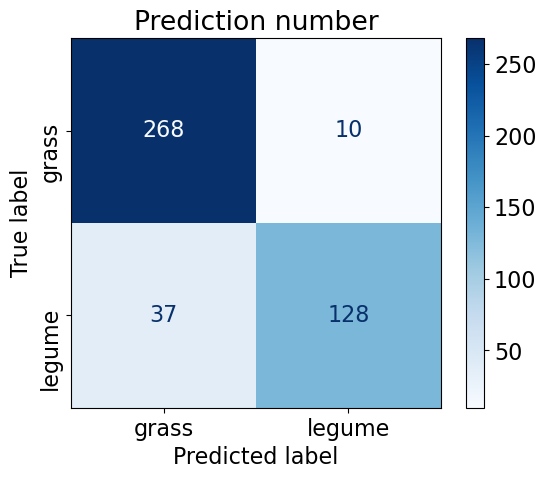

[[0.96402878 0.03597122]
 [0.22424242 0.77575758]]


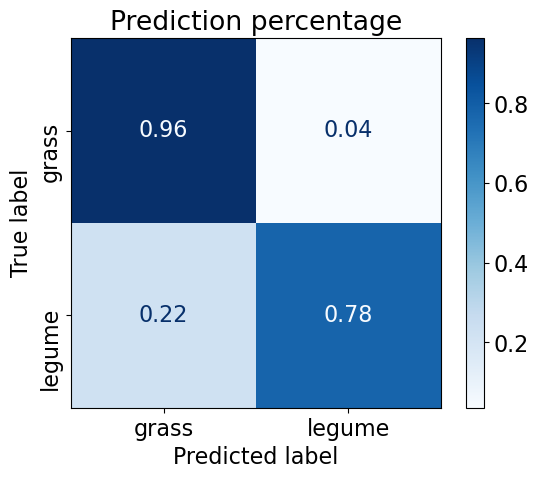

In [34]:
# Step 1: Load the data from Excel
data =pd.read_csv("../data/all_data_two_date_gps_vi_savi_filter_0.9_split.csv")

data_train = data[data['folder'] == "training"]
data_test = data[data['folder'] == "testing"]

# Step 2: Prepare the features (X) and target (y)
X_train = data_train.iloc[:,0:11]
y_train = data_train['class']

X_test = data_test.iloc[:,0:11]
y_test = data_test['class']
X_train

# Step 3: Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5)
y_pred = cross_val_predict(rf_clf, X_train, y_train, cv=cv)

# Step 5: Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

plt.rcParams.update({'font.size': 16})
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Prediction number')
plt.yticks(rotation="vertical")
# plt.legend(title="Prediction number", loc=[0.9, 1.01])
plt.show()

# Normalize the confusion matrix (to percentages)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

print(conf_matrix_normalized)

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Prediction percentage')
plt.yticks(rotation="vertical")
plt.show()

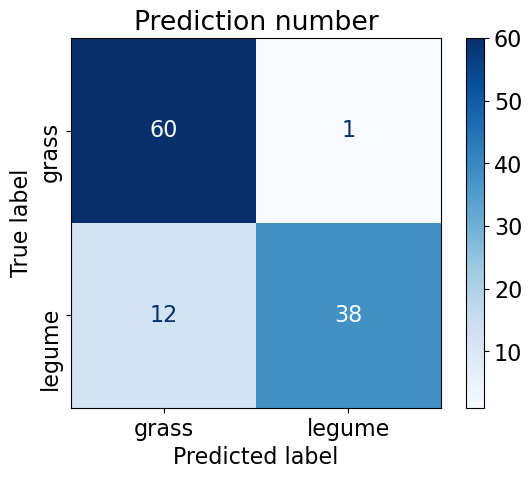

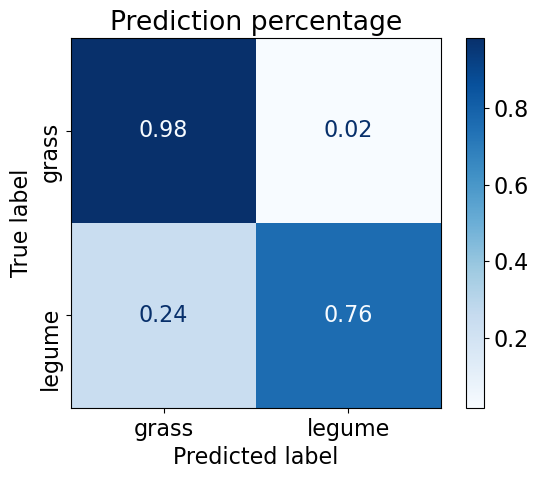

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_test = rf_model.predict(X_test)

# Step 5: Generate the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Prediction number')
plt.yticks(rotation="vertical")
plt.show()

# Normalize the confusion matrix (to percentages)
conf_matrix_normalized_test = conf_matrix_test.astype('float') / conf_matrix_test.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized_test, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues,values_format='.2f')
plt.title('Prediction percentage')
plt.yticks(rotation="vertical")
plt.show()


In [11]:

print(classification_report(y_test, y_pred_test, target_names=['grass', 'legume']))

              precision    recall  f1-score   support

       grass       0.83      0.98      0.90        61
      legume       0.97      0.76      0.85        50

    accuracy                           0.88       111
   macro avg       0.90      0.87      0.88       111
weighted avg       0.90      0.88      0.88       111



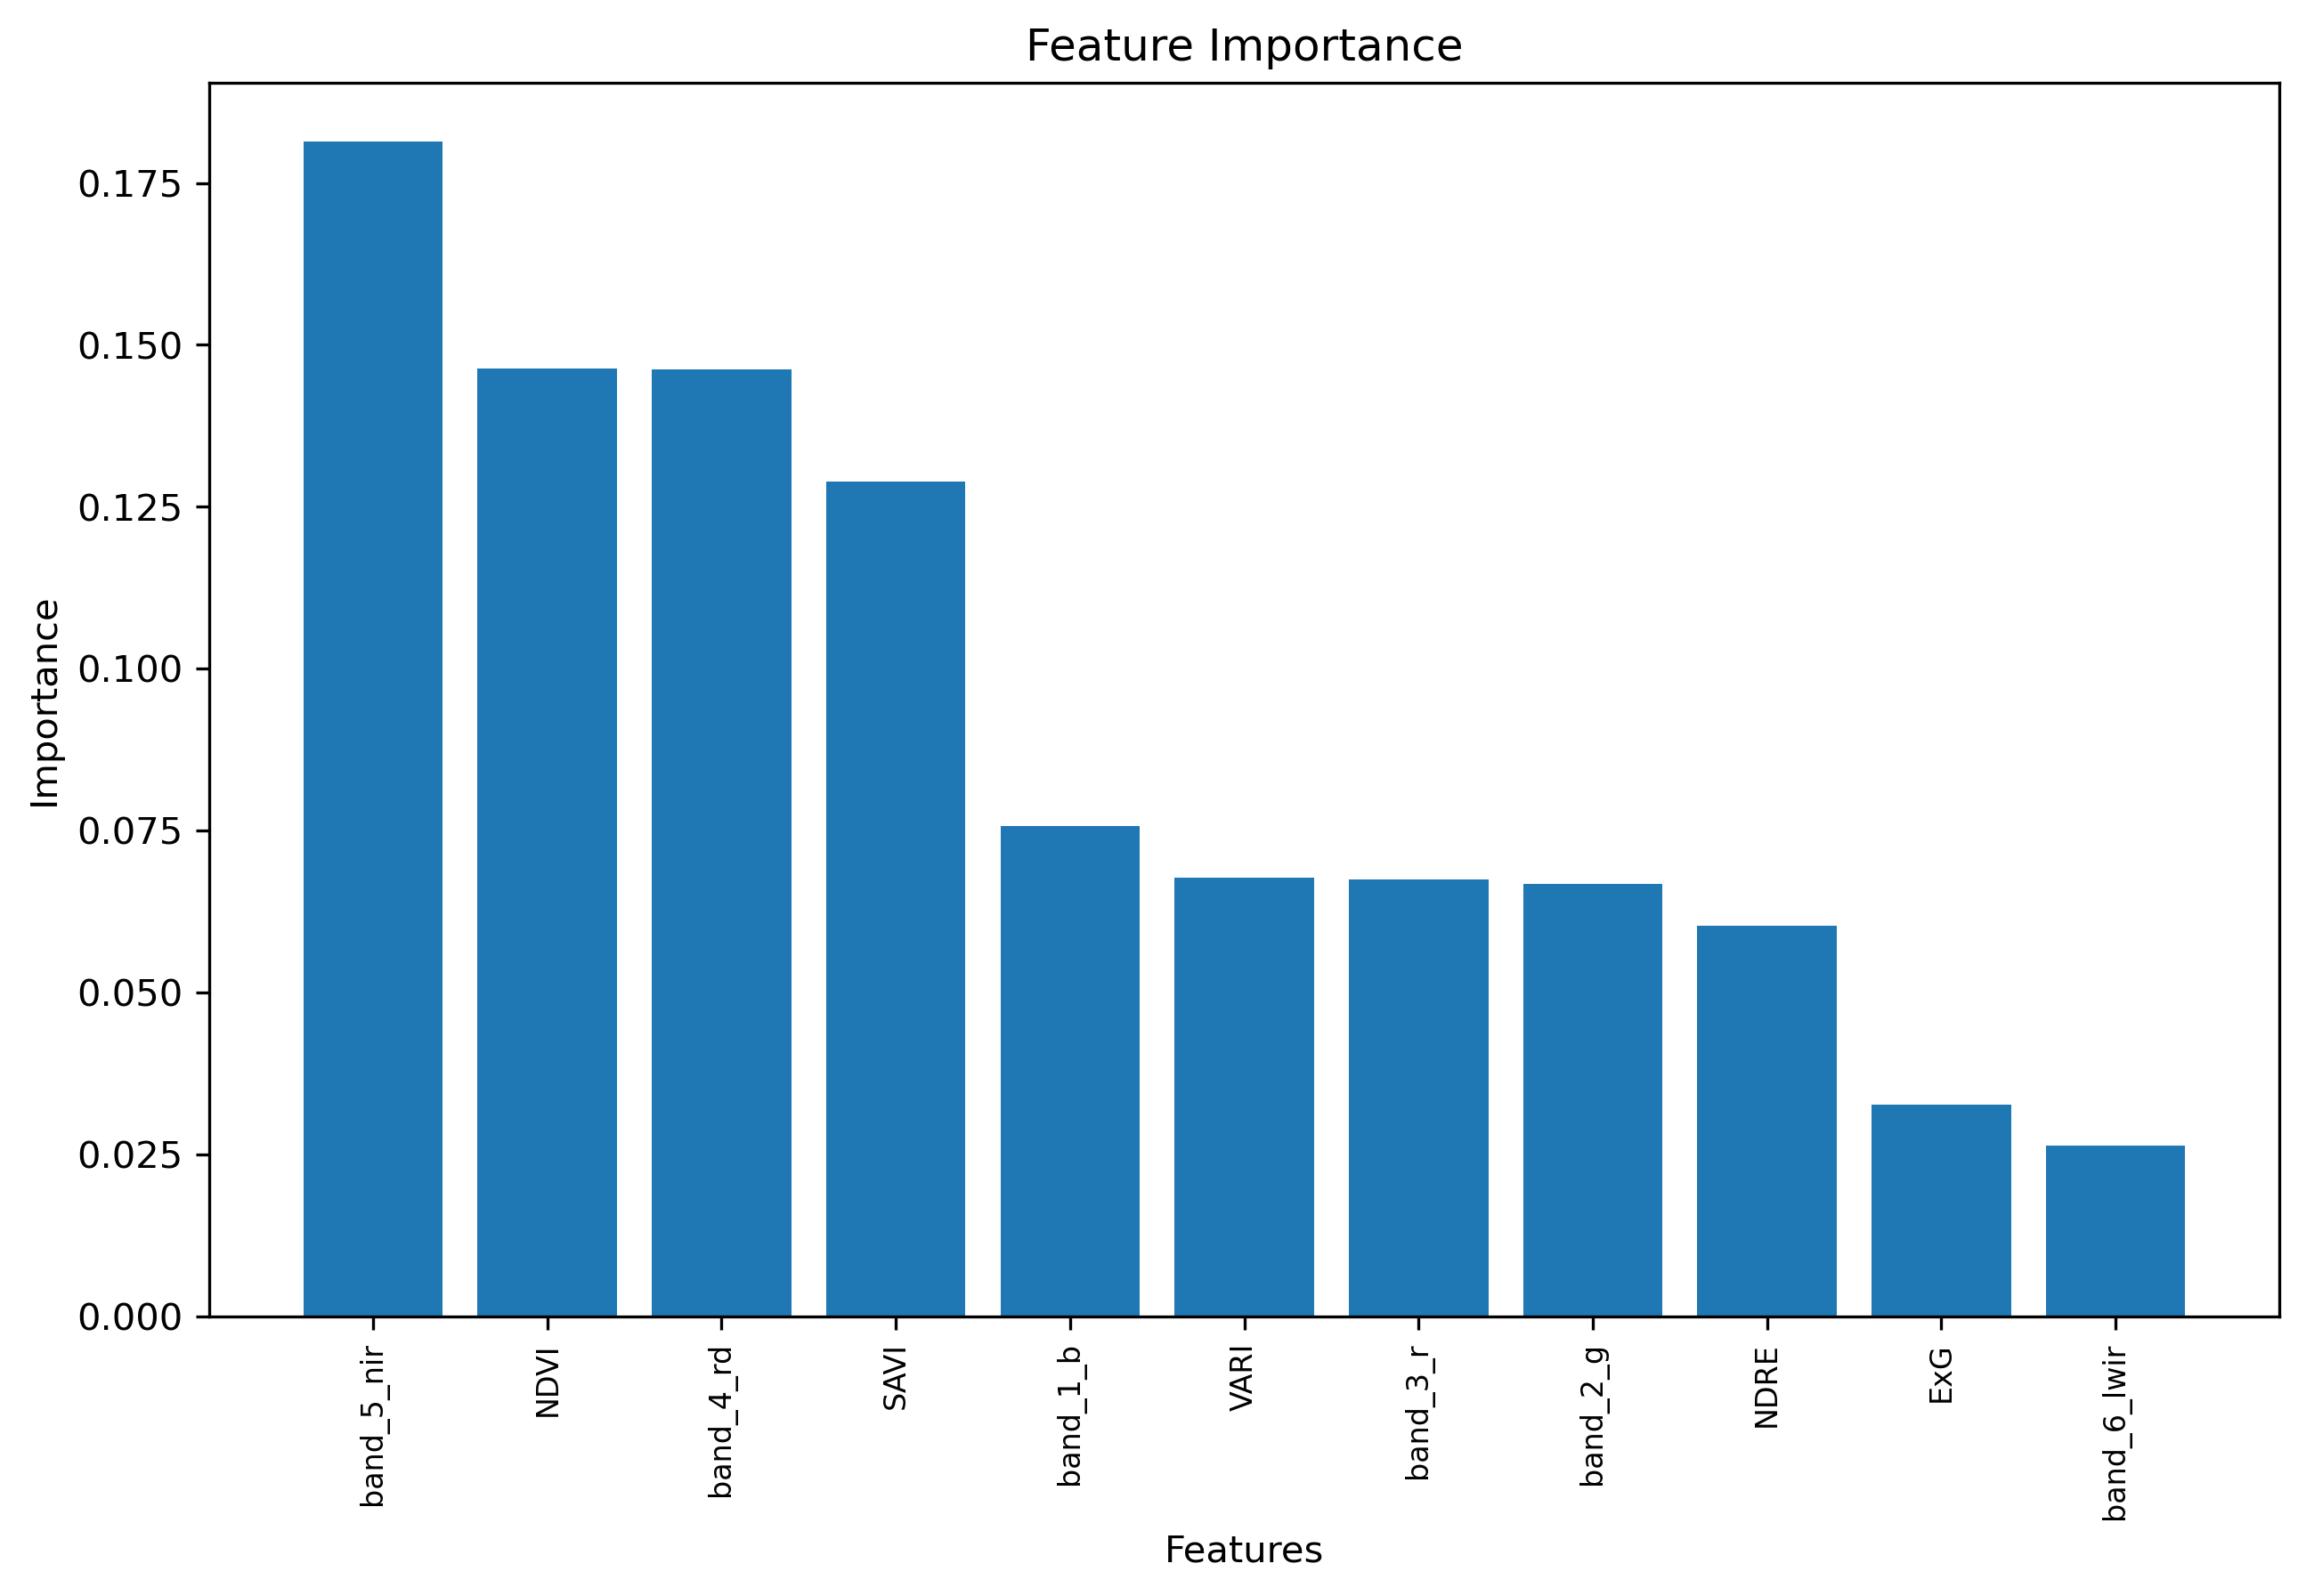

In [12]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances and feature names in descending order of importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6),dpi=300)
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90, fontsize=8)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


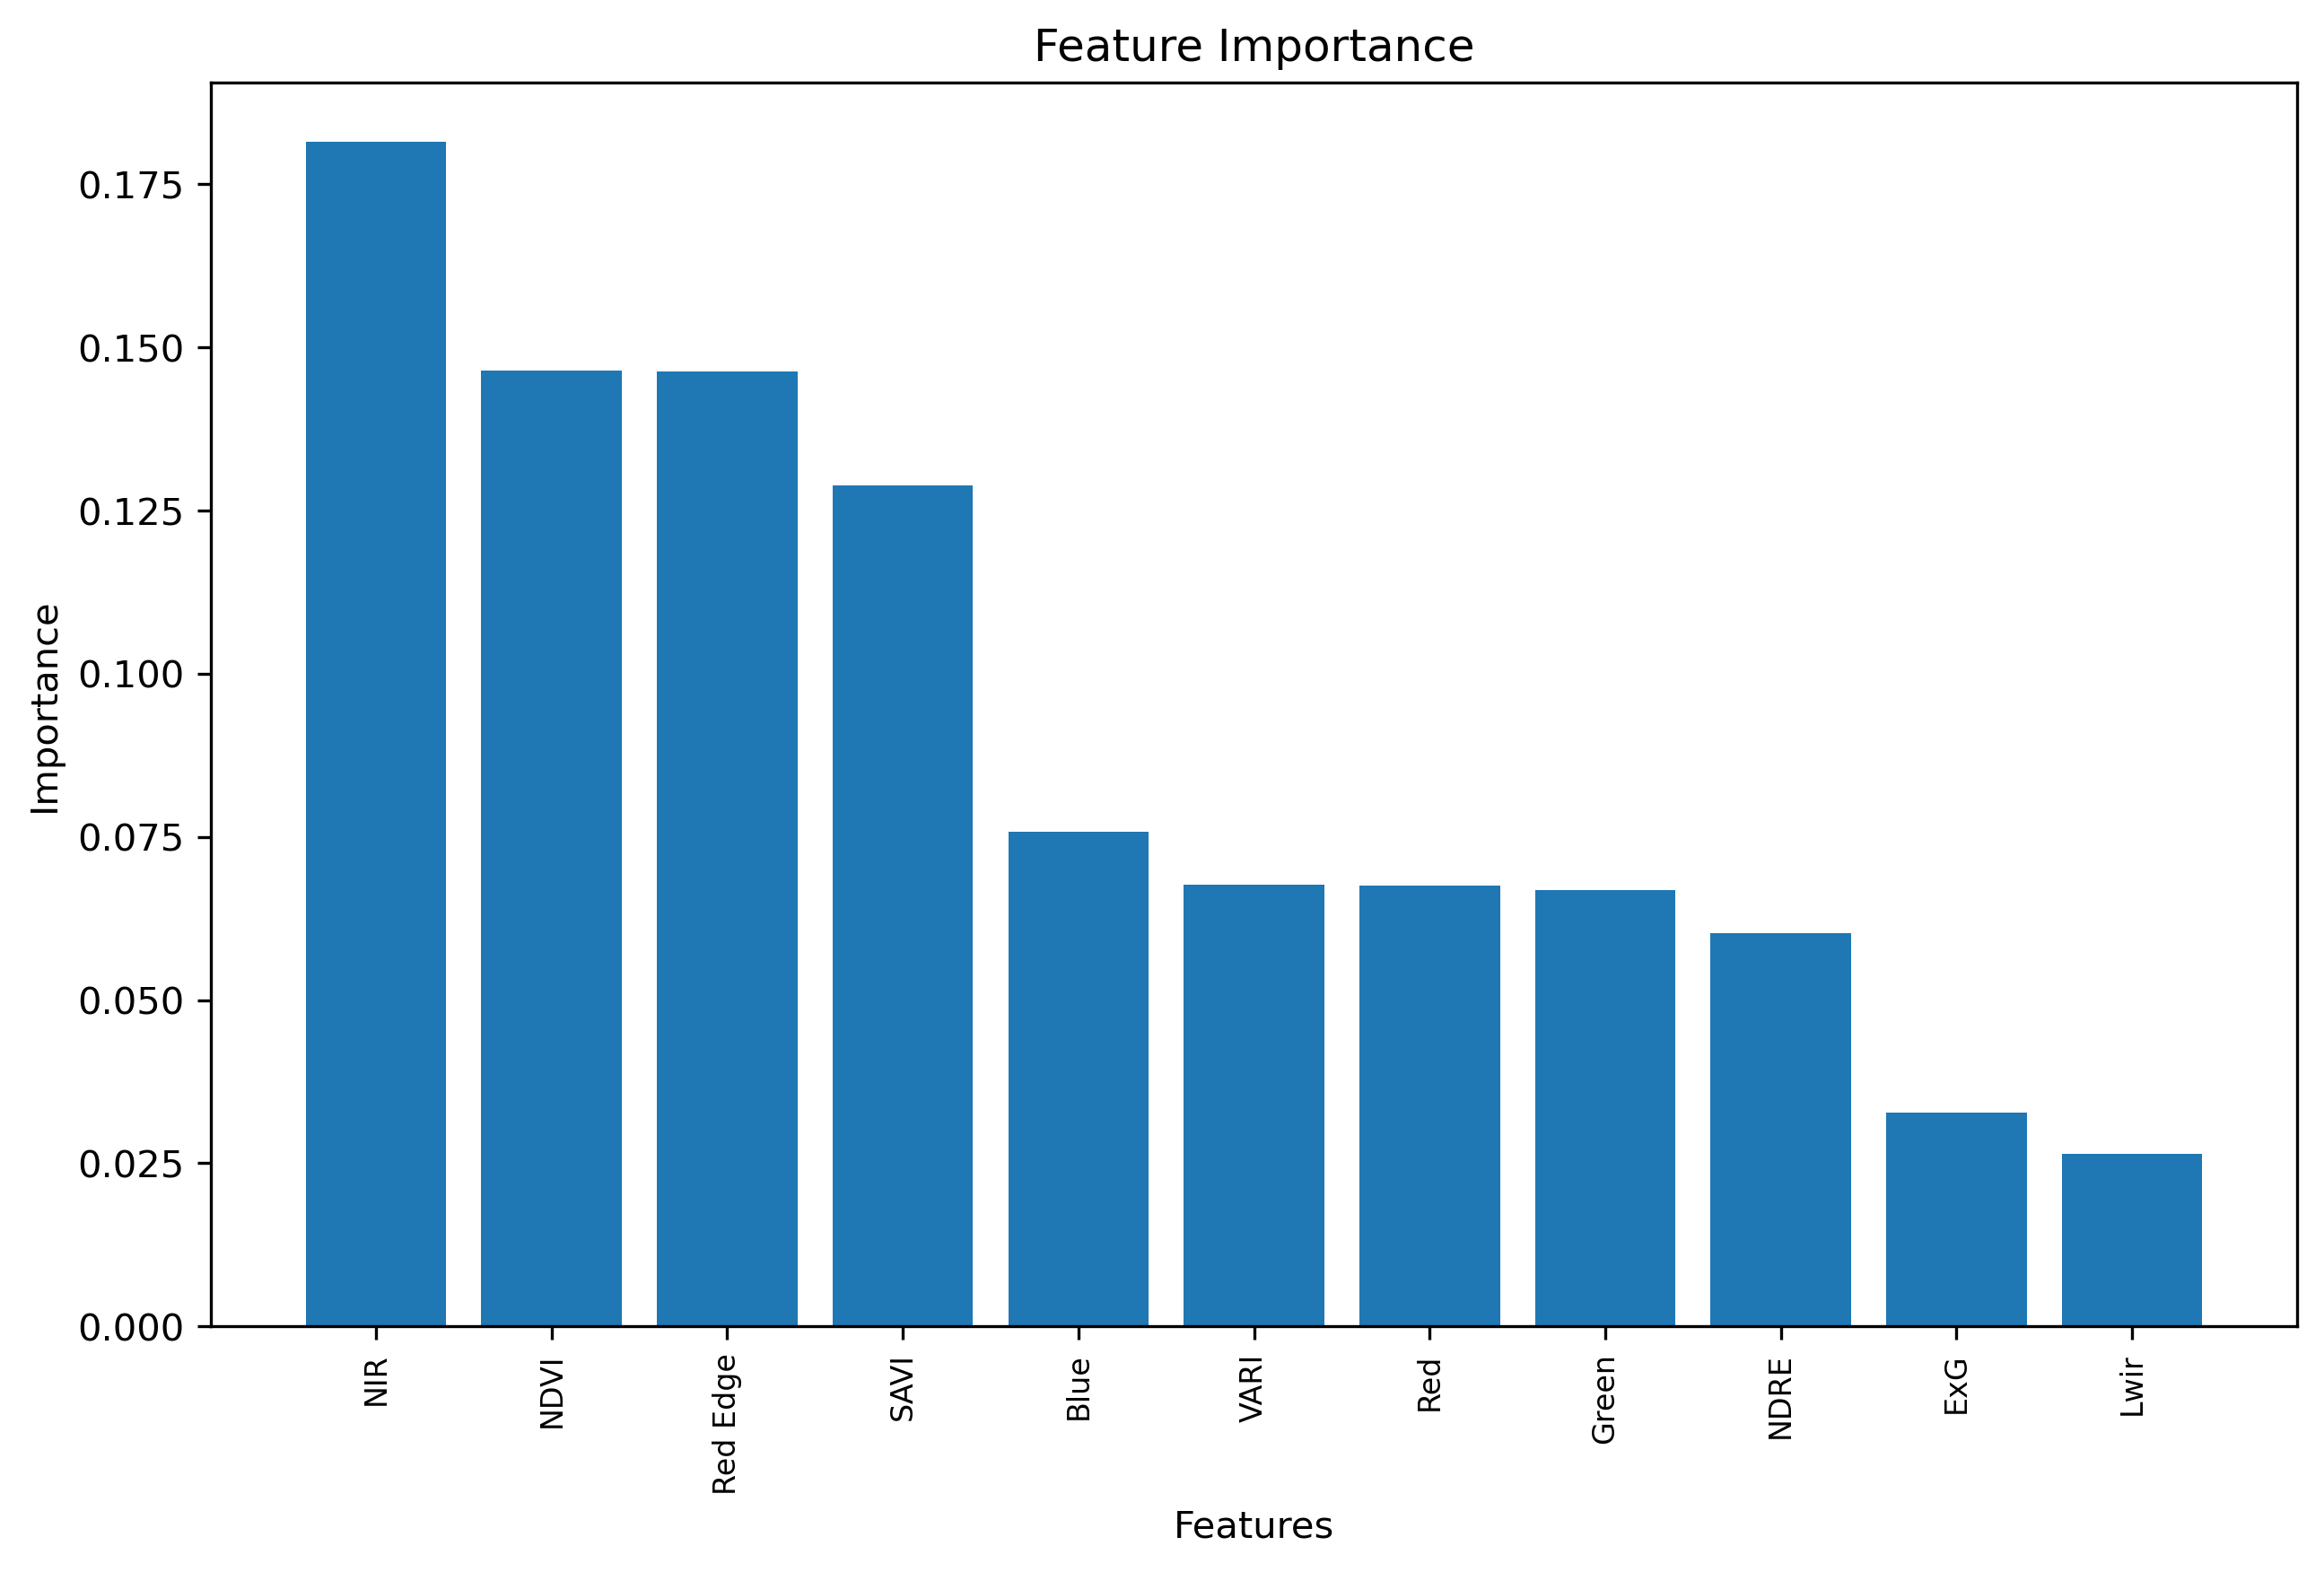

In [13]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances and feature names in descending order of importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6),dpi=300)
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), ["NIR", "NDVI", "Red Edge", "SAVI", "Blue", "VARI", "Red", "Green", "NDRE", "ExG", "Lwir"], rotation=90, fontsize=8)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

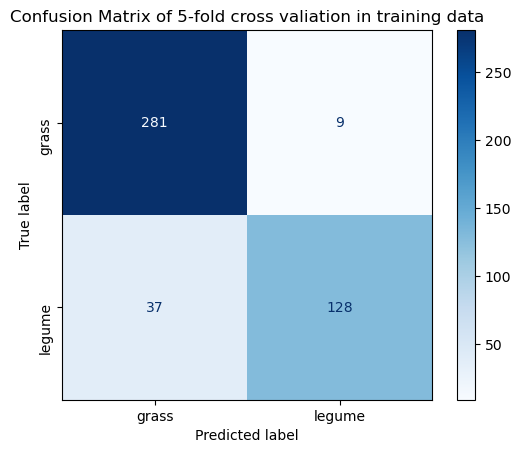

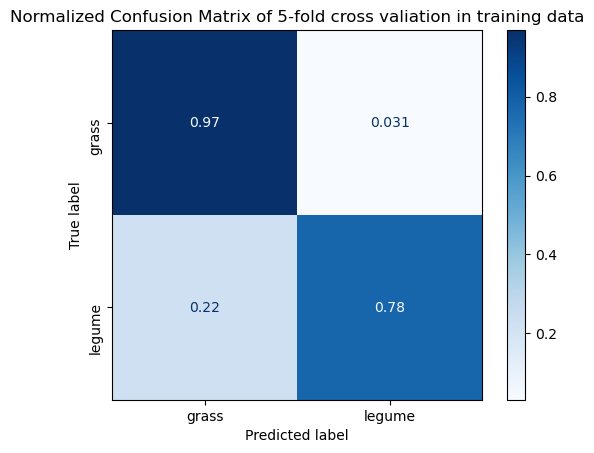

In [6]:
# Step 1: Load the data from Excel
data =pd.read_csv("../data/all_data_two_date_gps_vi_savi_filter_0.6_split.csv")

data_train = data[data['folder'] == "training"]
data_test = data[data['folder'] == "testing"]

# Step 2: Prepare the features (X) and target (y)
X_train = data_train.iloc[:,0:10]
y_train = data_train['class']

X_test = data_test.iloc[:,0:10]
y_test = data_test['class']
X_train

# Step 3: Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5)
y_pred = cross_val_predict(rf_clf, X_train, y_train, cv=cv)

# Step 5: Generate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of 5-fold cross valiation in training data')
plt.yticks(rotation="vertical")
plt.show()

# Normalize the confusion matrix (to percentages)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix of 5-fold cross valiation in training data')
plt.yticks(rotation="vertical")
plt.show()
    

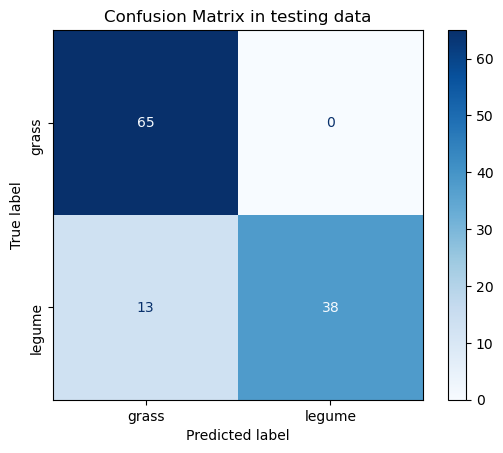

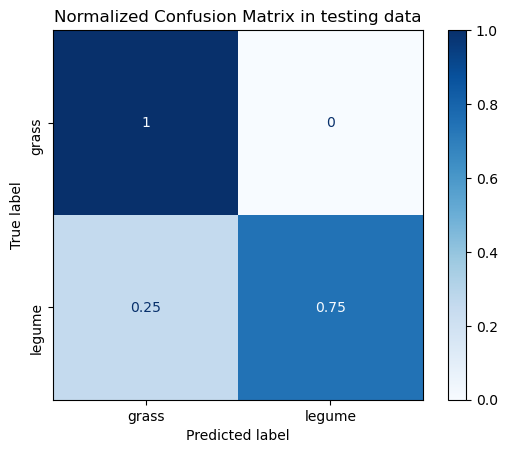

              precision    recall  f1-score   support

       grass       0.83      1.00      0.91        65
      legume       1.00      0.75      0.85        51

    accuracy                           0.89       116
   macro avg       0.92      0.87      0.88       116
weighted avg       0.91      0.89      0.88       116



In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_test = rf_model.predict(X_test)

# Step 5: Generate the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix in testing data')
plt.yticks(rotation="vertical")
plt.show()

# Normalize the confusion matrix (to percentages)
conf_matrix_normalized_test = conf_matrix_test.astype('float') / conf_matrix_test.sum(axis=1)[:, np.newaxis]

# Step 6: Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized_test, display_labels=["grass","legume"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix in testing data')
plt.yticks(rotation="vertical")
plt.show()

print(classification_report(y_test, y_pred_test, target_names=['grass', 'legume']))

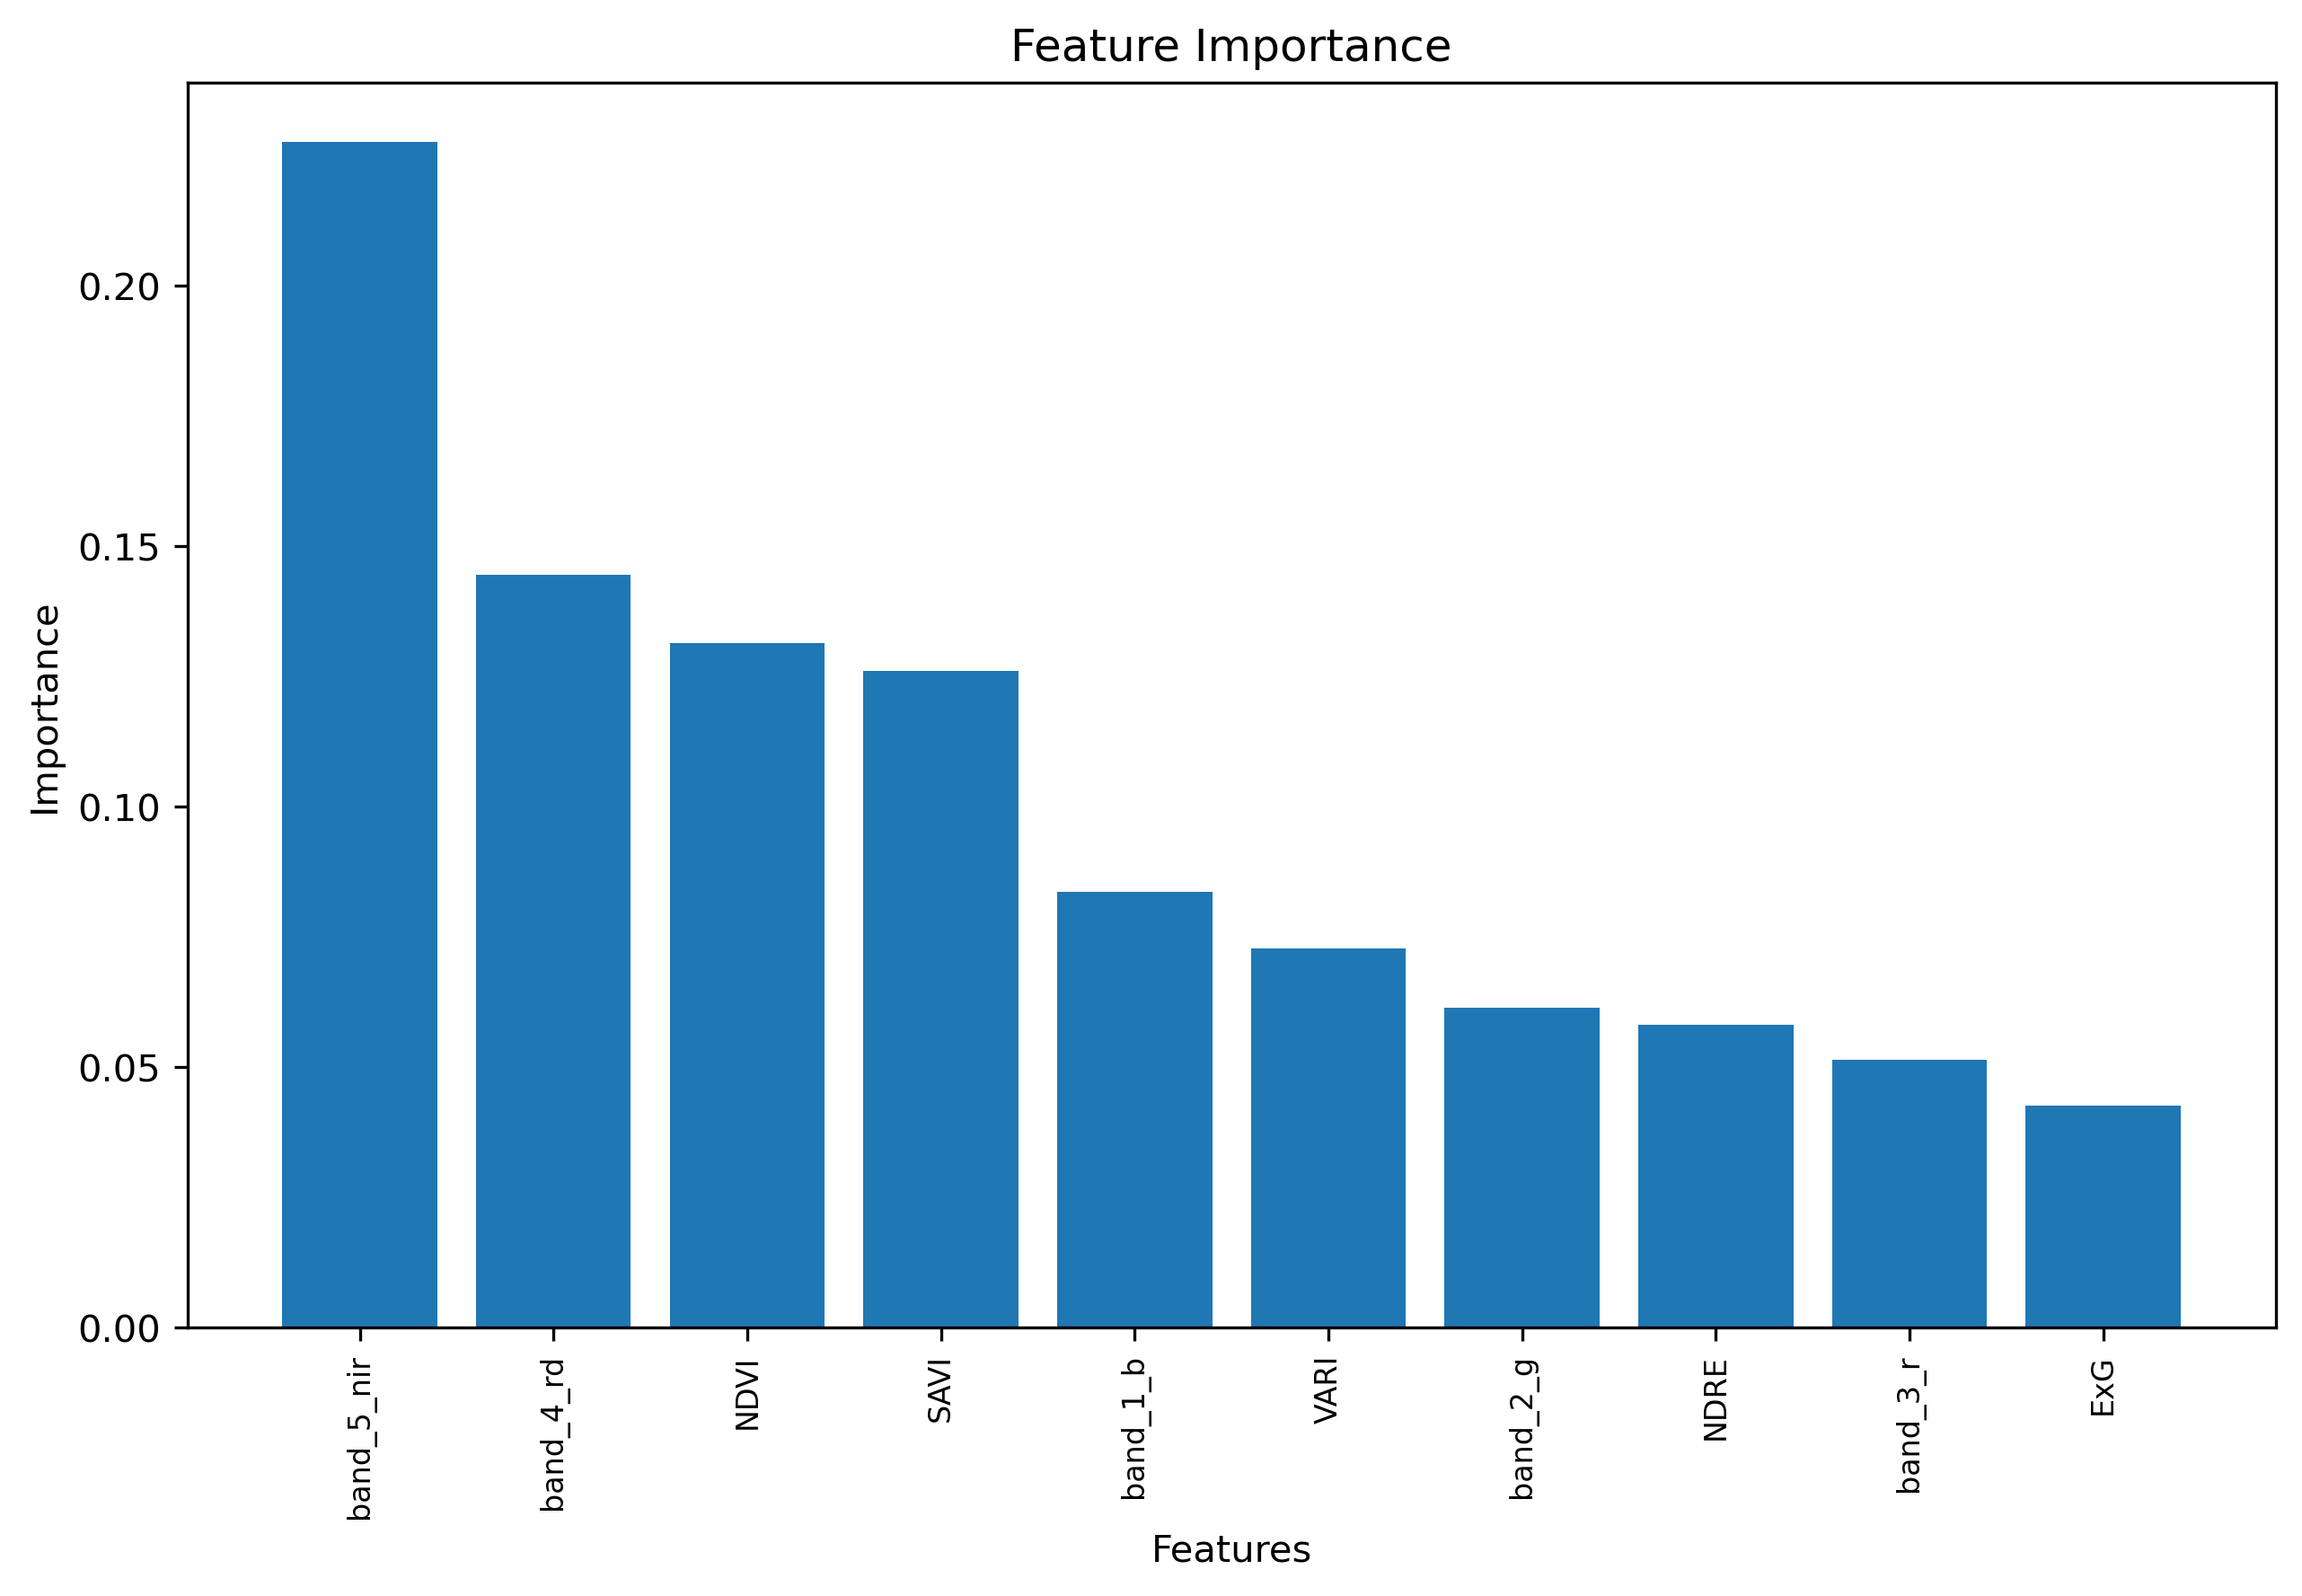

In [10]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances and feature names in descending order of importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6),dpi=300)
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90, fontsize=8)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

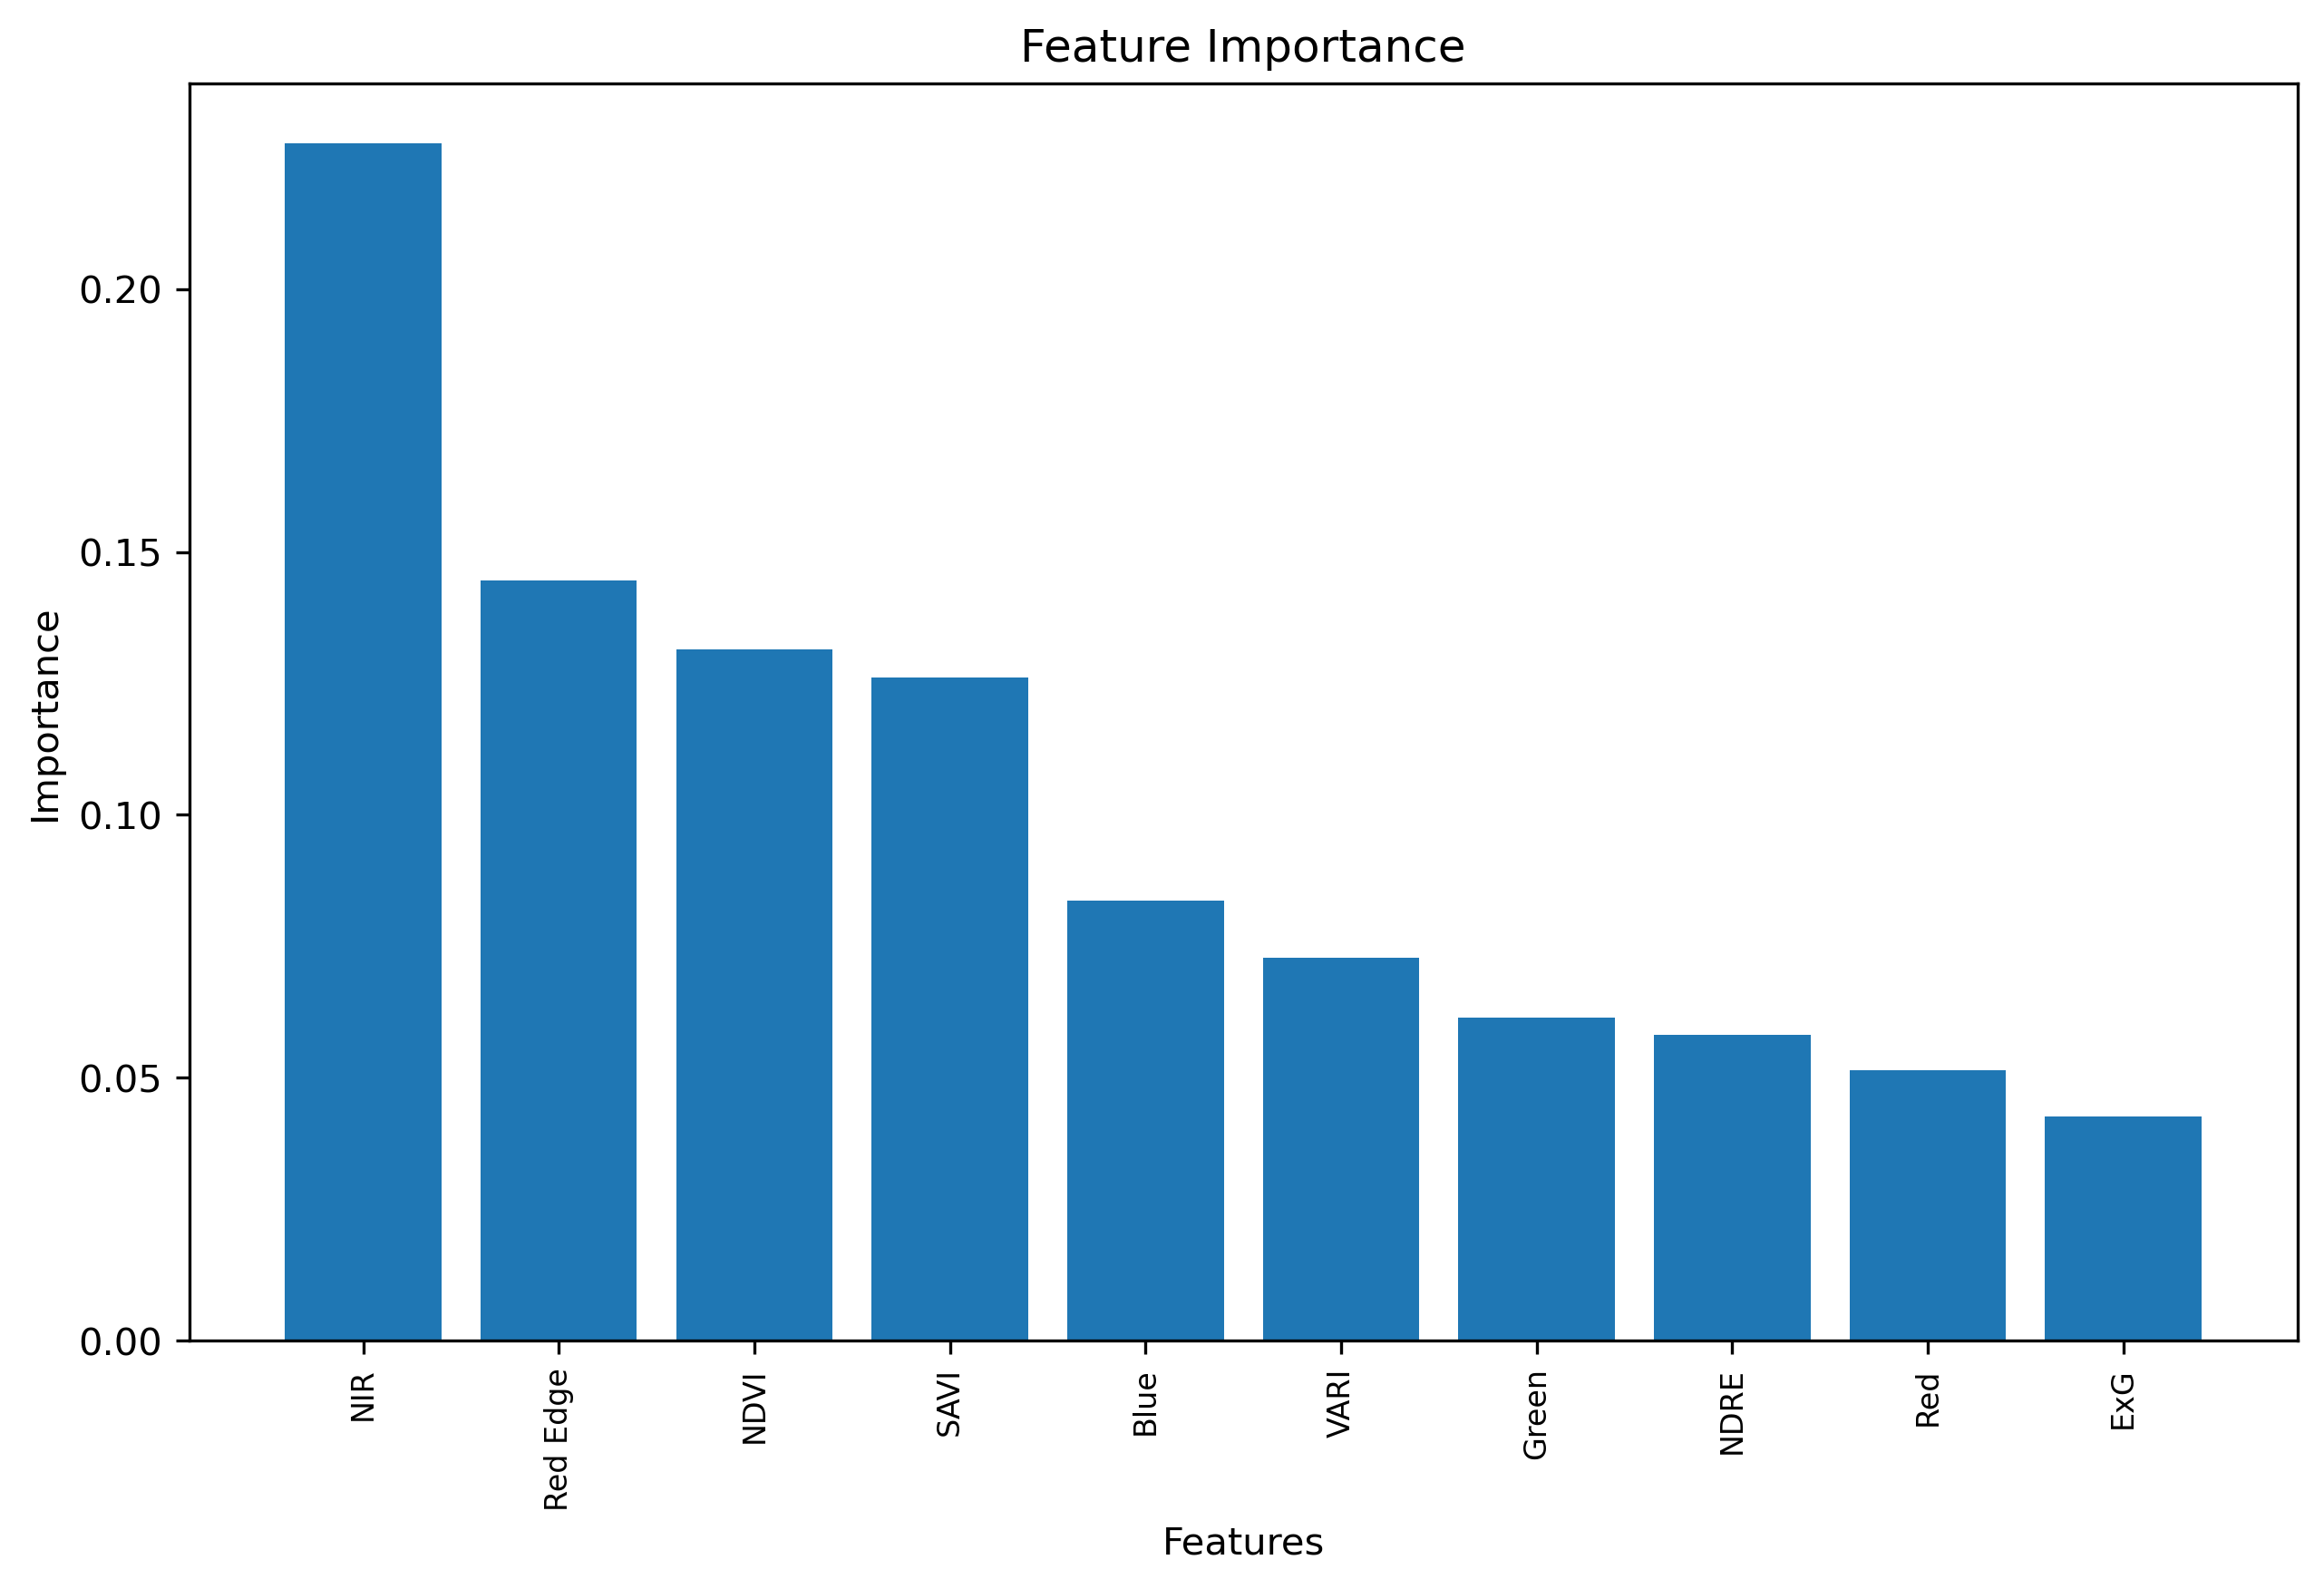

In [11]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances and feature names in descending order of importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6),dpi=300)
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), ["NIR", "Red Edge", "NDVI", "SAVI", "Blue", "VARI", "Green", "NDRE", "Red", "ExG"], rotation=90, fontsize=8)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()